In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pick

In [2]:
# importing data
DataFrame=pd.read_csv("mushrooms.csv")

In [3]:
DataFrame.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
DataFrame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
Column=DataFrame.columns


In [6]:
DataFrame.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


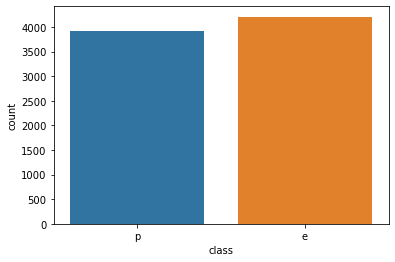

In [7]:
sns.countplot(DataFrame['class'])
plt.show()


In [8]:
DataFrame.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
t=DataFrame.columns.drop('class')

In [10]:
selectedCol=t.drop('veil-type')

In [11]:
selectedCol

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
len(selectedCol)

21

In [13]:
pick.dump(selectedCol,open('needColumn.pkl', 'wb'))

In [14]:
X=DataFrame.drop(columns=['class','veil-type'],axis=1)
Y=DataFrame[['class']]

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


In [16]:
Y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

In [18]:
X_train.shape


(6093, 21)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [20]:
clt=ColumnTransformer(transformers=[
    ('encode',OneHotEncoder(handle_unknown='ignore'),selectedCol)
])

In [21]:
clt.fit(X_train)

ColumnTransformer(transformers=[('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object'))])

In [22]:
X_train_en=clt.transform(X_train)


In [23]:
X_train_en.shape

(6093, 116)

In [24]:
X_test_en=clt.transform(X_test)

In [25]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()
Y_train_en=lbe.fit_transform(Y_train)
Y_test_en=lbe.transform(Y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
Y_train_en[:1625].shape

(1625,)

In [27]:
Y_test_en.shape

(2031,)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
testingModel=DecisionTreeClassifier()

In [30]:
class ModelCreation:
    
    def __init__(self,model):
        self.__X_Train=X_train_en
        self.__X_Test=X_test_en
        self.__Y_Train=Y_train_en
        self.__Y_Test=Y_test_en
        self.__currentModel=model
   
    def fit(self):
        self.__currentModel.fit(self.__X_Train,self.__Y_Train)
   
    
    def predictOneRecord(self,record):
        cls=self.__currentModel.predict(record.reshape(1,-1))
        if cls==0:
            print("it is not poison")
        else:
            print("it is  poison")
            
    def predictClass(self,array):
        return self.__currentModel.predict(array)

In [31]:
DecisionTreeModel=ModelCreation(DecisionTreeClassifier())

In [32]:
DecisionTreeModel.fit()
DecisionTreeModel.predictOneRecord(X_test_en[0].toarray().flatten())

it is not poison


In [33]:
model=DecisionTreeClassifier()


In [34]:
pipe=Pipeline([
    ('encode',OneHotEncoder(handle_unknown='ignore')),
    ('model',model)
])

In [35]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore')),
                ('model', DecisionTreeClassifier())])

In [36]:
pick.dump(pipe,open('pipeline.pkl', 'wb'))


In [37]:
X_test.values[0].reshape(1,-1)

array([['f', 'f', 'n', 'f', 'n', 'f', 'w', 'b', 'h', 't', 'e', 's', 'f',
        'w', 'w', 'w', 'o', 'e', 'n', 's', 'g']], dtype=object)

In [38]:
pipe.predict(X_test.values[0].reshape(1,-1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array(['e'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


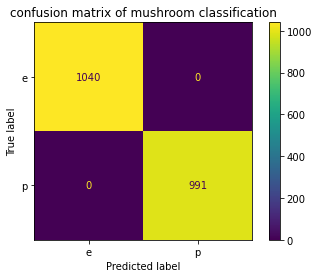

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe,X_test,Y_test)
plt.title("confusion matrix of mushroom classification")
plt.show()